# Analyzing Portfolio Risk and Return

In this Challenge, I aim to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep this easy, I use algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

I will evaluate four new investment options for inclusion in the client portfolios. I will determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.


### Importing the Data

1. Imported the required libraries and dependencies.

2. Used the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. I made sure to create a `DateTimeIndex`. Reviewed the first five rows of the DataFrame by using the `head` function.

3. Used the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. I Based this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. 

### Analyzing the Performance

I analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, I complete the following steps:

1. Using the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500.

2. Using the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. 

3. Using the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. 

4. Answering the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyzing the Volatility

I analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, I complete the following steps:

1. Using the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. 

2. Using the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. 

3. Answering the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyzing the Risk

I evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, I complete the following steps:

1. Using the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. I review the standard deviation calculations, sorted from smallest to largest.

2. Calculating the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, I multiply the standard deviation by the square root of the number of trading days. I used 262 days.

3. Using the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. 

4. Using the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. 

5. Answering the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyzing the Risk-Return Profile

To determine the overall risk of an asset or portfolio, we not only consider its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, I complete the following steps:

1. Using the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. 

2. Calculating the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, I divide the annualized average return by the annualized standard deviation for each. 

3. Visualizing the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. 

4. Answering the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversifying the Portfolio

* Using the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. 

Next, for each of the two portfolios of choice, I complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answering the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Importing the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
import pandas as pd

In [2]:
from pathlib import Path
import numpy as np
%matplotlib inline

#### Step 2: Using the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. 

In [3]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
whale_df=pd.read_csv(Path("./Resources/whale_navs.csv"),index_col="date",parse_dates=True, infer_datetime_format=True)

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Using the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Based this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. 

In [4]:
daily_returns=whale_df.pct_change().dropna()


In [5]:
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. 

###  Analyzing the Performance

Analyzing the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

<AxesSubplot:title={'center':'daily return of four fund portfolios and the S&P 500'}, xlabel='date'>

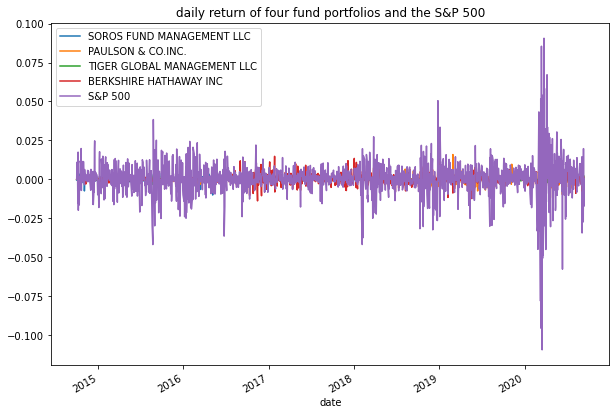

In [6]:
daily_returns.plot(figsize=(10,7), title="daily return of four fund portfolios and the S&P 500")


In [7]:
daily_returns_cumulative=(1+daily_returns).cumprod()
daily_returns_cumulative.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


<AxesSubplot:title={'center':'Compound return of four fund portfolios and the S&P 500'}, xlabel='date'>

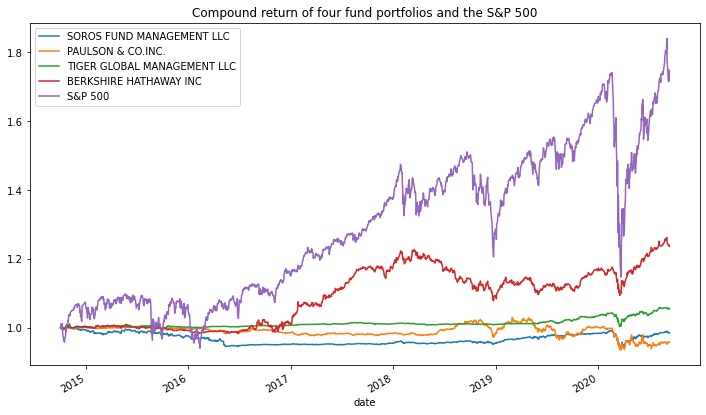

In [8]:
daily_returns_cumulative.plot(figsize=(12,7), title="Compound return of four fund portfolios and the S&P 500")


**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** Not really!

---

### Analyzing the Volatility

Analyzing the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

<AxesSubplot:title={'center':'Volatility of daily returns of four fund portfolios and the S&P 500'}>

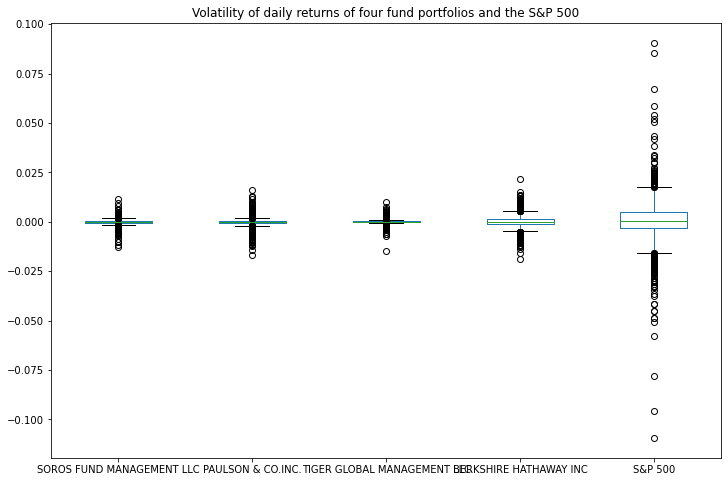

In [9]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns.plot.box(figsize=(12,8), title="Volatility of daily returns of four fund portfolios and the S&P 500")


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171
2014-10-03,0.001052,0.000368,0.000394,0.001248
2014-10-06,0.002456,-0.000008,0.000066,0.000267
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587
2014-10-08,0.000390,0.000369,0.000242,0.000842


<AxesSubplot:title={'center':'Volatility of daily returns of four fund portfolios without the S&P 500'}>

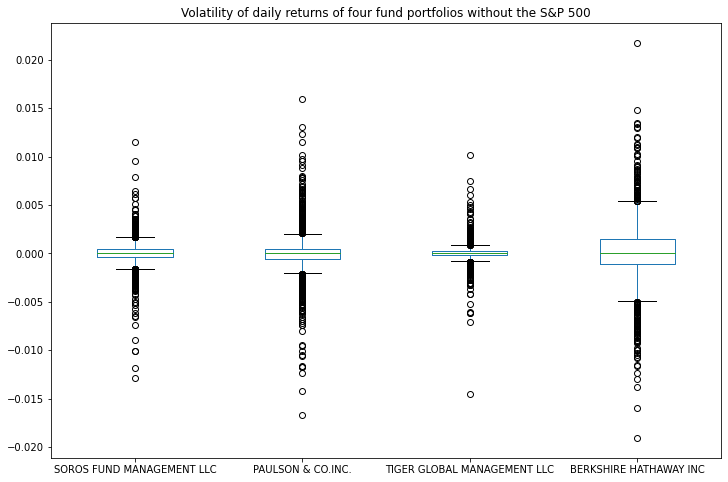

In [10]:
daily_return_no_SnP=daily_returns.drop(columns="S&P 500")
display(daily_return_no_SnP.head())
daily_return_no_SnP.plot.box(figsize=(12,8), title="Volatility of daily returns of four fund portfolios without the S&P 500")

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer**BERKSHIRE HATHAWAY INC was the most volatile and TIGER GLOBAL MANAGEMENT LLC was the least of the four.

---

### Analyzing the Risk

Evaluating the risk profile of each portfolio by using the standard deviation and the beta.

In [11]:
daily_returns_std=daily_returns.std().sort_values()
daily_returns_std

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [12]:
annualized_std=daily_returns_std*np.sqrt(252)
annualized_std

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,NaN,NaN,NaN,NaN,NaN
2014-10-03,NaN,NaN,NaN,NaN,NaN
2014-10-06,NaN,NaN,NaN,NaN,NaN
2014-10-07,NaN,NaN,NaN,NaN,NaN
2014-10-08,NaN,NaN,NaN,NaN,NaN
2014-10-09,NaN,NaN,NaN,NaN,NaN
2014-10-10,NaN,NaN,NaN,NaN,NaN
2014-10-13,NaN,NaN,NaN,NaN,NaN
2014-10-14,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':' rolling standard deviations of the four fund portfolios and of the S&P 500 index'}, xlabel='date'>

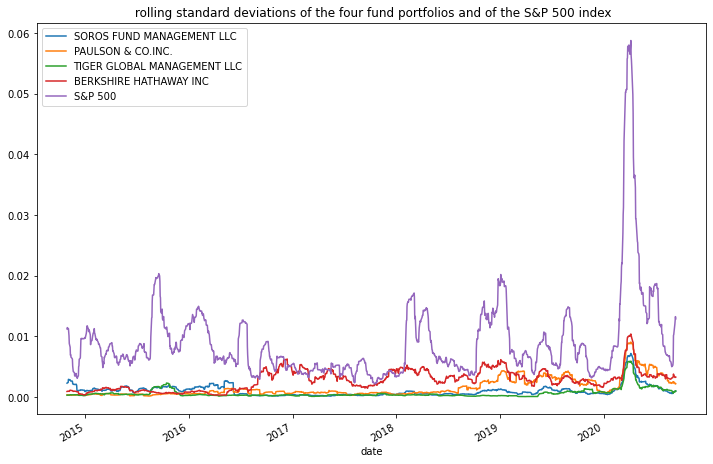

In [13]:
daily_returns.rolling(window=21).std()
display(daily_returns.rolling(window=21).std().head(22))
twentyone_rolling_std=daily_returns.rolling(window=21).std()
twentyone_rolling_std.plot(figsize=(12,8), title=" rolling standard deviations of the four fund portfolios and of the S&P 500 index")

<AxesSubplot:title={'center':' rolling standard deviations of the four fund portfolios without the S&P 500 index'}, xlabel='date'>

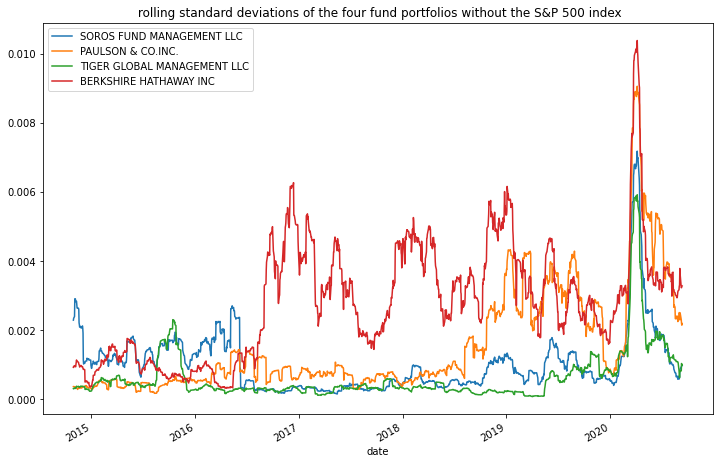

In [14]:
twentyone_rolling_std.drop(columns="S&P 500").plot(figsize=(12,8), title=" rolling standard deviations of the four fund portfolios without the S&P 500 index")


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Answer 1**: None of them. S&P 500 appears to be the most volatile one.

**Answer 2**: Not before 2017. After 2017 all these four portfolios show almost the same volatility trend as that os S&P 500.


**Answer 3**: BERKSHIRE HATHAWAY INC poses the most risk and it changing over time.

### Analyzing the Risk-Return Profile


In [15]:
average_annual_return_four_portfolios = daily_returns.mean() * 252
average_annual_return_four_portfolios.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [16]:
Sharpe_ratios=average_annual_return_four_portfolios/(daily_returns.std())
Sharpe_ratios

SOROS FUND MANAGEMENT LLC      -1.623808
PAULSON & CO.INC.              -3.016132
TIGER GLOBAL MANAGEMENT LLC     9.191372
BERKSHIRE HATHAWAY INC         11.390155
S&P 500                         9.359806
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios for the four funds and for the S&P 500'}>

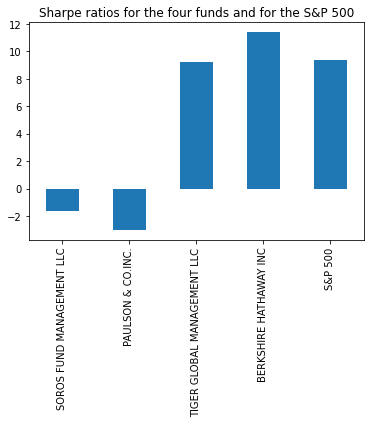

In [17]:
Sharpe_ratios.plot.bar(title="Sharpe ratios for the four funds and for the S&P 500")


---

### Diversifying the Portfolio


In [18]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
market_variance=daily_returns["S&P 500"].rolling(window=60).var()
market_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios of choice, I complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. 

2. Calculating the beta of the portfolio. To do that, we divide the covariance of the portfolio by the variance of the S&P 500.

3. Using the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plotting the 60-day rolling beta. 

In [19]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
SFM_covariance=daily_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(daily_returns["S&P 500"])

SFM_covariance.tail()

date
2020-09-04    0.000009
2020-09-08    0.000010
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [20]:
TGM_covariance=daily_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(daily_returns["S&P 500"])
TGM_covariance.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [21]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
SFM_beta=SFM_covariance/market_variance
SFM_beta

date
2014-10-02         NaN
2014-10-03         NaN
2014-10-06         NaN
2014-10-07         NaN
2014-10-08         NaN
                ...   
2020-09-04    0.086995
2020-09-08    0.084035
2020-09-09    0.081876
2020-09-10    0.082832
2020-09-11    0.082554
Length: 1497, dtype: float64

In [22]:
TGM_beta=TGM_covariance/market_variance
TGM_beta

date
2014-10-02         NaN
2014-10-03         NaN
2014-10-06         NaN
2014-10-07         NaN
2014-10-08         NaN
                ...   
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
Length: 1497, dtype: float64

In [23]:
# Calculate the average of the 60-day rolling beta
SFM_beta.mean()

0.0686227172631973

In [24]:
TGM_beta.mean()

0.03093001487238774

<AxesSubplot:title={'center':'Rolling Beta for SOROS FUND MANAGEMENT LLC'}, xlabel='date'>

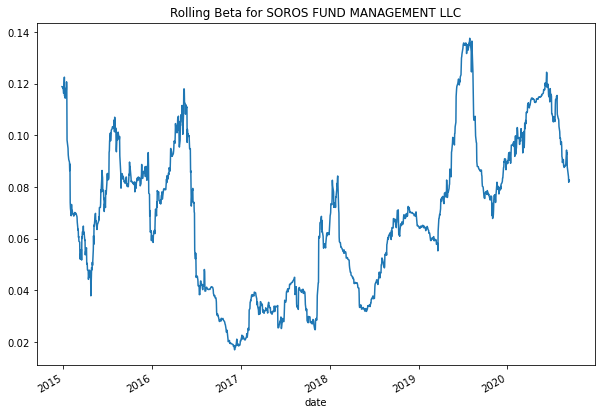

In [25]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
SFM_beta.plot(figsize=(10,7),title="Rolling Beta for SOROS FUND MANAGEMENT LLC")


<AxesSubplot:title={'center':'Rolling Beta for TIGER GLOBAL MANAGEMENT LLC'}, xlabel='date'>

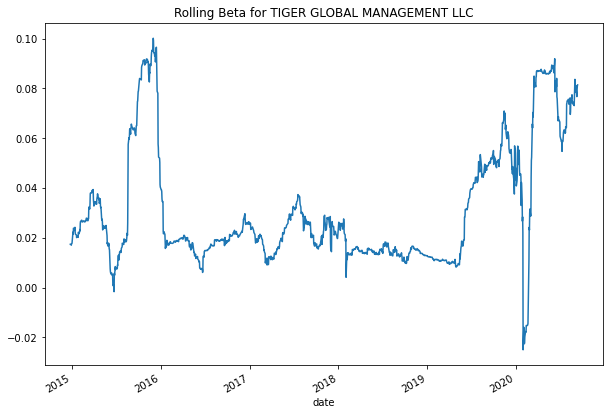

In [26]:
TGM_beta.plot(figsize=(10,7),title="Rolling Beta for TIGER GLOBAL MANAGEMENT LLC")

**Question 1:** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1:** SOROS FUND MANAGEMENT LLC is more sensetive to market volatility because it has higher beta.


**Question 2:** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2:** TIGER GLOBAL MANAGEMENT of course because it has a sharpe ratio.

---